In [ ]:
# Import The Dependencies.

import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

import requests

import time

import os



# Starting URL For Weather Map API Call.

URL = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + Weather_API_Key

print(URL)

In [2]:
# Use The Citipy Module To Determine City Based On Latitude And Longitude.

from citipy import citipy

In [3]:
# The Range For Latitudes And Longitudes.

lat_range = (-90, 90)

lng_range = (-180, 180)

In [4]:
# Lists For Storing Cities, Latitudes, And Longitudes.

lat_lngs = []

cities = []


# Create A Set Of Random Latitude And Longitude Combinations.

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)

lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)

lat_lngs = zip(lats, lngs)


# Identify The Nearest City For Each Latitude And Longitude Combination.

for lat_lng in lat_lngs:
    
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    
    if city not in cities:
        
        cities.append(city)
        

# Generate The Count For The Number Of Cities.

cities_count = len(cities)

print(cities_count)

617


In [5]:
# Establish Lists For The Dataframe.

name_city = []

clouds = []

countries = []

dates = []

humidity = []

lats = []

lngs = []

max_temps = []

wind_speeds = []


# Establish A Record Counter Initialized At 1.

record = 1


# Generate Statement For Log.

print("Beginning Data Retrieval")

print('-'*25)



# Loop Through All Cities In Cities List.

for city in cities:
    
    
    try:
        
        response = requests.get(f'{URL}&q={city}').json()
        
        name_city.append(response['name'])
        
        clouds.append(response['clouds']['all'])
        
        countries.append(response['sys']['country'])
        
        dates.append(response['dt'])
        
        humidity.append(response['main']['humidity'])
        
        lats.append(response['coord']['lat'])
        
        lngs.append(response['coord']['lon'])
        
        max_temps.append(response['main']['temp_max'])
        
        wind_speeds.append(response['wind']['speed'])
        
        
        print(f'Processing Record {record} | {city}')
        
        
        # Increase The Record Counter.
        
        record += 1
        
        
        # Do Not Exceed The API Call Limit.
        
        time.sleep(1.01)
        
        
        
    # Skip If No Record Found For A City.
    
    except:
        
        print('City not found. Skipping...')
        
    continue

Beginning Data Retrieval
-------------------------
Processing Record 1 | sambava
Processing Record 2 | tab
Processing Record 3 | san lorenzo
Processing Record 4 | thompson
Processing Record 5 | albany
Processing Record 6 | winchester
Processing Record 7 | chuy
Processing Record 8 | narasannapeta
City not found. Skipping...
Processing Record 9 | punta arenas
Processing Record 10 | praia da vitoria
Processing Record 11 | bengkulu
Processing Record 12 | adrar
Processing Record 13 | atuona
Processing Record 14 | rio grande
Processing Record 15 | ribeira grande
Processing Record 16 | new norfolk
Processing Record 17 | boke
Processing Record 18 | saint george
Processing Record 19 | hilo
Processing Record 20 | east london
Processing Record 21 | shingu
Processing Record 22 | ushuaia
Processing Record 23 | campoverde
Processing Record 24 | santa rosa
City not found. Skipping...
Processing Record 25 | busselton
Processing Record 26 | carutapera
Processing Record 27 | hermanus
Processing Record 2

Processing Record 231 | sompeta
Processing Record 232 | leshukonskoye
Processing Record 233 | port moresby
Processing Record 234 | dauphin
City not found. Skipping...
Processing Record 235 | katsuura
Processing Record 236 | ocampo
Processing Record 237 | san cristobal
Processing Record 238 | souillac
Processing Record 239 | elko
Processing Record 240 | santander
Processing Record 241 | bathsheba
Processing Record 242 | hertford
Processing Record 243 | giyani
Processing Record 244 | waipawa
Processing Record 245 | nikolskoye
Processing Record 246 | castanos
Processing Record 247 | tuatapere
Processing Record 248 | mogadishu
Processing Record 249 | codrington
Processing Record 250 | belmonte
Processing Record 251 | stokmarknes
City not found. Skipping...
Processing Record 252 | flinders
Processing Record 253 | boguchany
City not found. Skipping...
Processing Record 254 | haines junction
Processing Record 255 | beringovskiy
Processing Record 256 | doka
Processing Record 257 | boves
Proces

Processing Record 461 | makat
Processing Record 462 | petropavlovsk-kamchatskiy
Processing Record 463 | shirokiy
City not found. Skipping...
Processing Record 464 | kamenka
Processing Record 465 | dongsheng
Processing Record 466 | komsomolskiy
Processing Record 467 | callaway
Processing Record 468 | lagos
Processing Record 469 | isangel
City not found. Skipping...
Processing Record 470 | peddapuram
Processing Record 471 | darnah
City not found. Skipping...
Processing Record 472 | berezovyy
Processing Record 473 | mehamn
Processing Record 474 | turukhansk
Processing Record 475 | ewo
Processing Record 476 | asau
Processing Record 477 | chlumec
Processing Record 478 | adilabad
Processing Record 479 | vestmanna
Processing Record 480 | ampanihy
City not found. Skipping...
Processing Record 481 | idlib
Processing Record 482 | teahupoo
Processing Record 483 | luebo
City not found. Skipping...
Processing Record 484 | gilgit
Processing Record 485 | riberalta
Processing Record 486 | kjollefjord


In [6]:
# Create A Dictionary Of Values.

weatherdata = {
    
    'City': name_city,
    
    'Cloudiness': clouds,
    
    'Country': countries,
    
    'Date': dates,
    
    'Humidity': humidity,
    
    'Lat': lats,
    
    'Lng': lngs,
    
    'Max Temperature': max_temps,
    
    'Wind Speed': wind_speeds
    
}


# Create A New Dataframe For Values In The Dictionary.

df_weather = pd.DataFrame(weatherdata)


# Show The Top Of The Dataframe.

df_weather.head(10)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temperature,Wind Speed
0,Sambava,58,MG,1657067396,82,-14.2667,50.1667,67.80,11.07
1,Tab,8,HU,1657067398,74,46.7314,18.0320,64.24,15.41
2,San Lorenzo,0,PY,1657067399,83,-25.3333,-57.5333,70.74,0.00
3,Thompson,75,CA,1657067400,30,55.7435,-97.8558,71.76,3.44
4,Albany,99,US,1657067287,93,42.6001,-73.9662,68.41,1.99
5,Winchester,25,GB,1657067403,84,51.0651,-1.3187,58.51,3.44
6,Chui,100,UY,1657067404,88,-33.6971,-53.4616,54.95,7.58
7,Narasannapeta,100,IN,1657067405,84,18.4167,84.0500,80.38,4.52
8,Punta Arenas,0,CL,1657067407,100,-53.1500,-70.9167,21.31,8.05
9,Praia da Vitória,75,PT,1657067408,88,38.7333,-27.0667,66.76,8.77


In [7]:
# Create The Output File (CSV).

output_data_file = "Weather-Data/cities.csv"


# Export The Dataframe Into The CSV File.

df_weather.to_csv(output_data_file)

In [8]:
# Extract Relevant Fields From The DataFrame For Plotting.

lats = df_weather["Lat"]

max_temps = df_weather["Max Temperature"]

humidity = df_weather["Humidity"]

clouds = df_weather["Cloudiness"]

wind_speeds = df_weather["Wind Speed"]

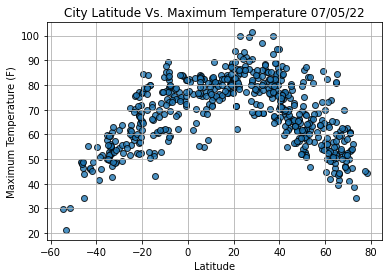

In [9]:
# Import The Time Module. 

import time


# Build The Scatter Plot For Latitude Vs. Maximum Temperature.

plt.scatter(lats,
            
            max_temps,
            
            edgecolor="black", linewidths=1, marker="o",
            
            alpha=0.8, label="Cities")


# Incorporate The Other Graph Properties.

plt.title(f"City Latitude Vs. Maximum Temperature "+ time.strftime("%x"))

plt.ylabel("Maximum Temperature (F)")

plt.xlabel("Latitude")

plt.grid(True)


# Save The Figure.

plt.savefig("Weather-Data/Figure 1.png")


# Display The Plot.

plt.show()

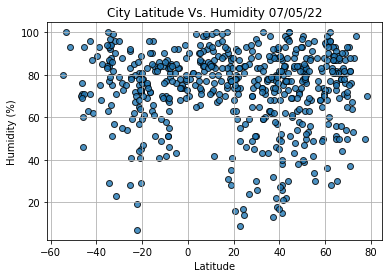

In [10]:
# Build The Scatter Plots For Latitude Vs. Humidity.

plt.scatter(lats,
            
            humidity,
            
            edgecolor="black", linewidths=1, marker="o",
            
            alpha=0.8, label="Cities")


# Incorporate The Other Graph Properties.

plt.title(f"City Latitude Vs. Humidity "+ time.strftime("%x"))

plt.ylabel("Humidity (%)")

plt.xlabel("Latitude")

plt.grid(True)



# Save The Figure.

plt.savefig("Weather-Data/Figure 2.png")



# Display The Plot.

plt.show()

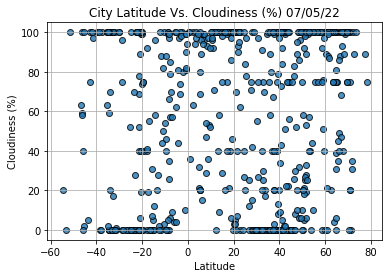

In [11]:
# Build The Scatter Plots For Latitude Vs. Cloudiness.

plt.scatter(lats,
            
            clouds,
            
            edgecolor="black", linewidths=1, marker="o",
            
            alpha=0.8, label="Cities")


# Incorporate The Other Graph Properties.

plt.title(f"City Latitude Vs. Cloudiness (%) "+ time.strftime("%x"))

plt.ylabel("Cloudiness (%)")

plt.xlabel("Latitude")

plt.grid(True)



# Save The Figure.

plt.savefig("Weather-Data/Figure 3.png")


# Display The Plot.

plt.show()

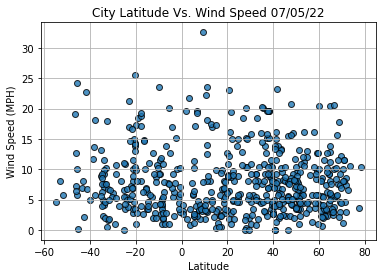

In [12]:
# Build The Scatter Plots For Latitude Vs. Wind Speed.

plt.scatter(lats,
            
            wind_speeds,
            
            edgecolor="black", linewidths=1, marker="o",
            
            alpha=0.8, label="Cities")



# Incorporate The Other Graph Properties.

plt.title(f"City Latitude Vs. Wind Speed "+ time.strftime("%x"))

plt.ylabel("Wind Speed (MPH)")

plt.xlabel("Latitude")

plt.grid(True)



# Save The Figure.

plt.savefig("Weather-Data/Figure 4.png")



# Display The Plot.

plt.show()